In [1]:
import pandas as pd

In [2]:
A = pd.read_csv("C:/Users/akaks/Downloads/digitsnpixels.csv")

In [4]:
A

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = A.drop('label',axis=1).values

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Visualizing one image by converting into 28*28

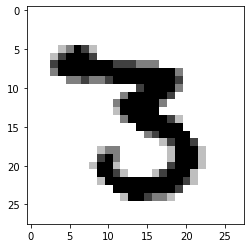

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X[13:14].reshape(28,28),cmap=plt.cm.binary)

In [18]:
A.label[13:14]

13    3
Name: label, dtype: int64

# Defining X and Y in array format

In [19]:
Y = A.label.values

In [27]:
Y_cat = pd.get_dummies(Y).values

In [28]:
Y_cat

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Scale X

In [29]:
X_scaled = X/255

In [31]:
X_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytain,ytest = train_test_split(X_scaled,Y_cat,test_size=0.2,random_state=21)

In [58]:
xtrain.shape

(33600, 784)

In [59]:
xtest.shape

(8400, 784)

In [60]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [61]:
xtrain.shape

(33600, 28, 28, 1)

# Creating a NN

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,BatchNormalization,Flatten

In [40]:
nn = Sequential()
nn.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Flatten())

nn.add(Dense(120,activation='relu'))
nn.add(Dense(10,activation='softmax'))

In [41]:
nn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
nn.fit(xtrain,ytain,epochs=50,batch_size=64)

Epoch 1/50
525/525 [==============================] - 8s 15ms/step - loss: 0.0167 - accuracy: 0.9942
Epoch 2/50
525/525 [==============================] - 9s 16ms/step - loss: 0.0166 - accuracy: 0.9941
Epoch 3/50
525/525 [==============================] - 8s 15ms/step - loss: 0.0127 - accuracy: 0.9953
Epoch 4/50
525/525 [==============================] - 8s 16ms/step - loss: 0.0135 - accuracy: 0.9952
Epoch 5/50
525/525 [==============================] - 8s 15ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 6/50
525/525 [==============================] - 9s 17ms/step - loss: 0.0115 - accuracy: 0.9965
Epoch 7/50
525/525 [==============================] - 9s 18ms/step - loss: 0.0086 - accuracy: 0.9969
Epoch 8/50
525/525 [==============================] - 10s 18ms/step - loss: 0.0069 - accuracy: 0.9975
Epoch 9/50
525/525 [==============================] - 9s 18ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/50
525/525 [==============================] - 9s 18ms/step - loss: 0.0106 - accur

In [62]:
pred_prob = nn.predict(xtest)

In [63]:
from numpy import argmax
pred = argmax(pred_prob,axis=1)

In [64]:
ytest =argmax(ytest,axis=1)

In [65]:
ytest

array([1, 4, 2, ..., 0, 1, 2], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)

0.9864285714285714

In [67]:
confusion_matrix(ytest,pred)

array([[803,   1,   0,   0,   0,   0,   6,   1,   2,   1],
       [  0, 881,   8,   0,   1,   0,   0,   1,   2,   0],
       [  0,   1, 790,   0,   0,   0,   0,   3,   2,   0],
       [  0,   0,   4, 813,   0,   3,   0,   4,   2,   2],
       [  2,   2,   1,   0, 818,   0,   4,   1,   0,   1],
       [  1,   0,   1,   1,   0, 800,   2,   0,   1,   0],
       [  2,   1,   0,   0,   4,   1, 877,   0,   3,   0],
       [  0,   1,   7,   0,   0,   1,   0, 875,   2,   0],
       [  1,   1,   2,   1,   1,   2,   3,   0, 788,   4],
       [  3,   1,   0,   0,   6,   3,   0,   2,   1, 841]], dtype=int64)